# EDA Week 2 Assignment Model Solution

Note: This is one way of doing the project. Approach should be similar not exactly same. I have used one method and you may have used another method. Methods I used a generic as discussed during the session, may be some extra bit. There are many methods to perform the same task. At the end aim is to get better and correct accuracy or less error in the model.

* Mainly your approach and method should be correct.

### Assignment Questions:

Buying and selling of an old car is a big and emerging market in India. People want to get a good price for an old car. Similarly, they want to buy a good second hand car at a cheaper price. Car price depends on many things, such as model, year, condition, mileage etc. Hence, companies are looking for data analysts and data scientists who can help them to build a model to predict the car price with an aim to get profit as well as customer satisfaction.   

You have been hired by a company which buys an old car. The CEO of the company wants to update the current model to improve the car price prediction. He built a team composed of data analysts, statisticians, domain experts and data scientists. Your role is to deal with raw data as a data analyst and perform detailed analysis using feature engineering and exploratory data analysis techniques to find out important variables into the model.

Some hint: Please write an introduction of the project. Provide comments for all codes. Give proper explanation of all figures. Justify your steps and give a complete conclusion. Introduction should address:
Why is the major challenge?
What are the major factors associated with car price based on previous studies? 
Your aim in this study? You can have multiple aims.
Conclusion should include the aim of the study.

Tasks to do: Missing values, outliers, skewness, feature engineering techniques wherever possible with an aim to identify important features only.


## Introduction
Buying and selling of an old car is a big and emerging market in India. People want to get a good price for an old car. Similarly, they want to buy a good second hand car at a cheaper price. Car price depends on many things, such as model, year, condition, mileage etc. Hence, it is important to figure out which feature of the dataset will be imperative for the model. As ultimate aim of the companies are to build a model to predict the car price with an aim to get profit as well as customer satisfaction.  

### Aim:
- Perform necesary data cleaning steps
- Perform appropriate steps to identify important features in the data

### Dataset:

"CarPrice_Week2_EDA.csv"

### Dataset description:
Dataset contains features of cars. This dataset contains 205 observations as well as 26 variables. 

- Note: Remember data scientists will create a model to predict the car price, so your complete analysis should be focused on car price.

### Target variable:
Car price

### Problem description:
Predicting car price based on its features.

## Car Price Prediction
The solution is divided into the following sections:

* Data understanding and exploration
* Data cleaning
* Data preparation
* Feature selection

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

### Importing Libraries

In [ ]:
# To Import libraries

import pandas as pd                                  # Data Analysis
import numpy as np                                   # Numerical Analysis
import matplotlib.pyplot as plt                      # To create static, animated, and interactive visualizations 
from matplotlib.pyplot import subplot                # To plot multiple plots on a single figure
import seaborn as sns                                # data visualization library based on matplotlib for random distributions
%matplotlib inline
from scipy import stats                              # Statistics functions
from sklearn.preprocessing import StandardScaler     # Standardization

### Reading the Dataset

In [ ]:
# To read data 

cars = pd.read_csv("CarPrice_Week2_EDA.csv")

In [ ]:
# summary of the dataset
print(cars.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* There are 205 rows, 26 columns and no null values

In [ ]:
# To see first five rows

cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# To see last five rows

cars.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# Dataset description

print("Dataset contains {} observations as well as {} variables.".format(cars.shape[0], cars.shape[1]))

Dataset contains 205 observations as well as 26 variables.


In [ ]:
#list of variables in the dataset 

print("List of variables in dataset: {}".format(list(cars.columns)))

List of variables in dataset: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


- **Price** is the target variable which is continuous and rest are independent variables
- **Numerical Independent Variable**
    - ‘wheelbase’, ‘carlength’, ‘carwidth’, ‘carheight’, ‘curbweight’, ‘enginesize’, ‘boreratio’, ‘stroke’, ‘compressionratio’, ‘horsepower’, ‘peakrpm’, ‘citympg’, ‘highwaympg’
- **Categorical Independent variable**
    - ‘symboling’, ‘car_name’, ‘fueltype’, ‘aspiration’, ‘doornumber’, ‘carbody’, ‘drivewheel’, ‘enginelocation’, ‘enginetype’, ‘cylindernumber’, ‘fuelsystem’

* There are 16 numeric variables and 10 categorical variables in the dataset. Size of 41.8+ KB and all variables are not null.
* Info function suggests that data type for symboling is wrong.

### Understanding the Data Dictionary
The data dictionary contains the meaning of various attributes; some non-obvious ones are:

#### Exploring the data variables

In [ ]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

* Most cars comes under 0, 1, 2, and 3

In [ ]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()


std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


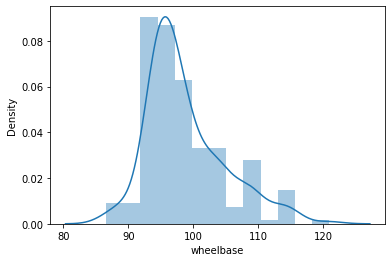

In [ ]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


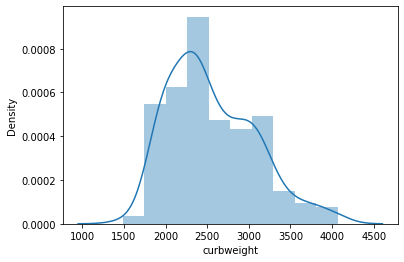

In [ ]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


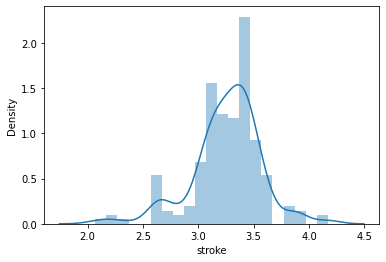

In [ ]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


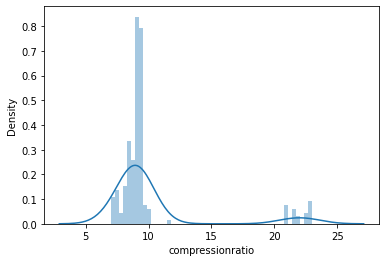

In [ ]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


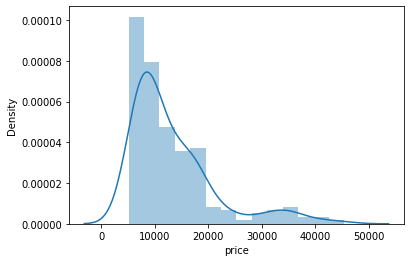

In [ ]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

### Data Exploration
To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [ ]:
# To see Data types in the dataset 

print("Columns in dataset: ","\n", list(cars.columns),"\n")
print("Categorical Columns in dataset: ","\n",list(cars.select_dtypes(include="object")),"\n")
print("Numerical Columns in dataset: ","\n",list(cars.select_dtypes(include=["int64", "float64"])), "\n")
print("Datetime Columns in dataset: ","\n",list(cars.select_dtypes(include="datetime64")))

Columns in dataset:  
 ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

Categorical Columns in dataset:  
 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 

Numerical Columns in dataset:  
 ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

Datetime Columns in dataset:  
 []


In [ ]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable symboling is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [ ]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

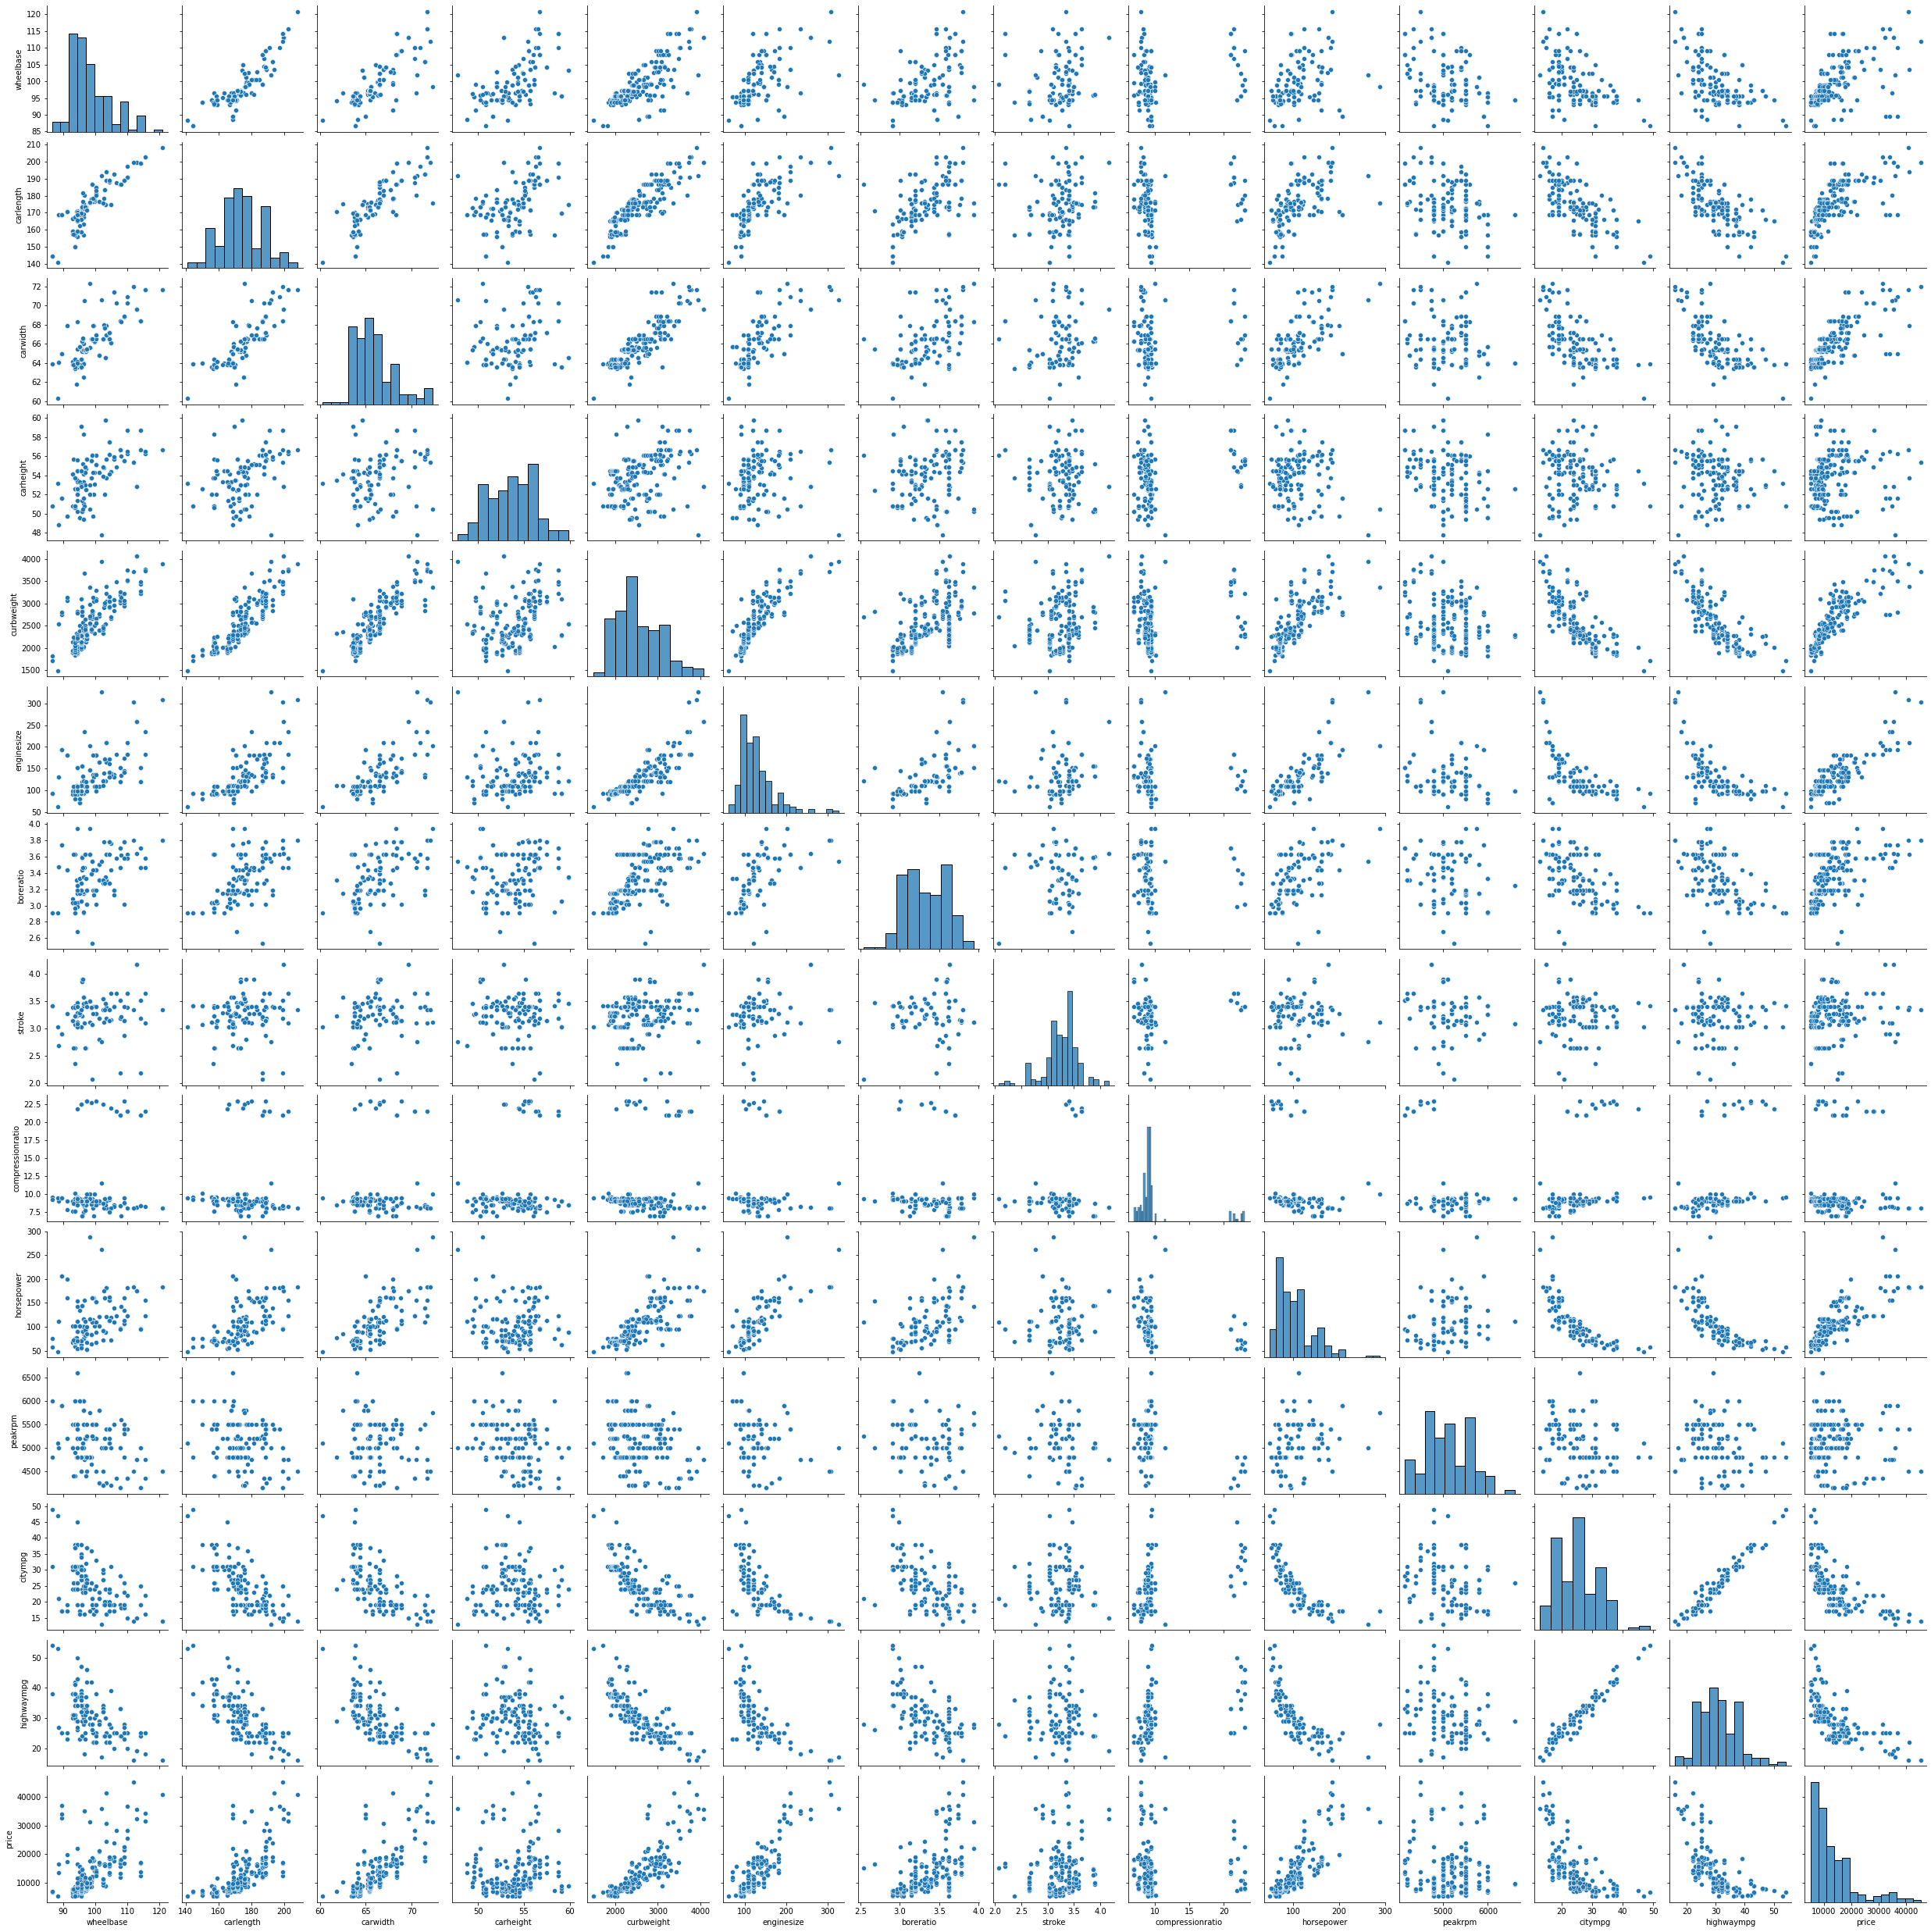

In [ ]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


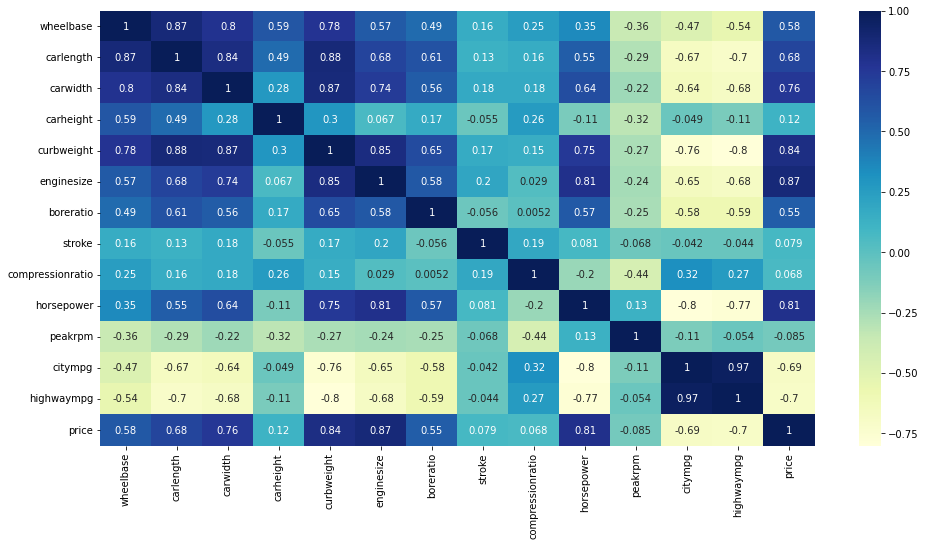

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

* Since some features are skewed and non-linear, Pearson correlation is not a good approach. Let's go with Spearman Correlation. 

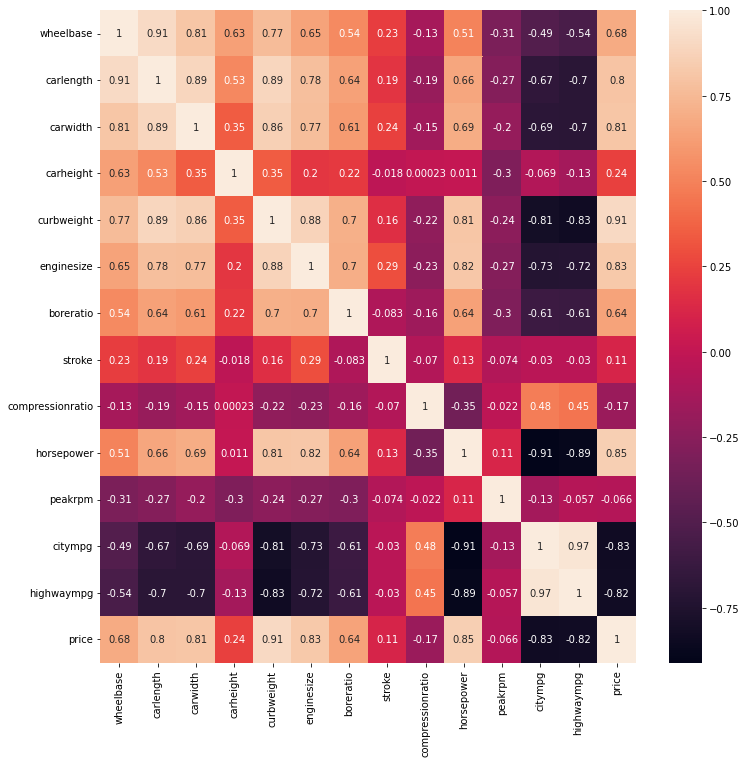

In [ ]:
# Spearman Correlation

plt.figure(figsize=(12,12))
sns.heatmap(cars_numeric.corr(method='spearman'),annot=True)

#### Insights:
Correlation of price with independent variables:

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

* Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

* Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

### 2. Data Cleaning
Let's now conduct some data cleaning steps.


 

We don't see any null values in the dataset but there is a possibility of erroneous values in the dataset.

#### Missing values Analysis

In [ ]:
#Missing values analysis 

#Sum of missing values in each column of the dataset, descending sorting

totalSumNull = cars.isnull().sum().sort_values(ascending=False)

#Sum of missing values in each column of the dataset expressed as a percentage

percentSumNull = cars.isnull().sum()/cars.isnull().count()*100

#Rounding off the percentages to one decimal place, degressive sorting

percentSumNullRounded = (round(percentSumNull, 1)).sort_values(ascending=False)

#Combining "totalNull" and "percentRounded" in DataFrame

missingData = pd.concat([totalSumNull, percentSumNullRounded], axis=1, keys=["Total", "%"])
missingData

,Total,%
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


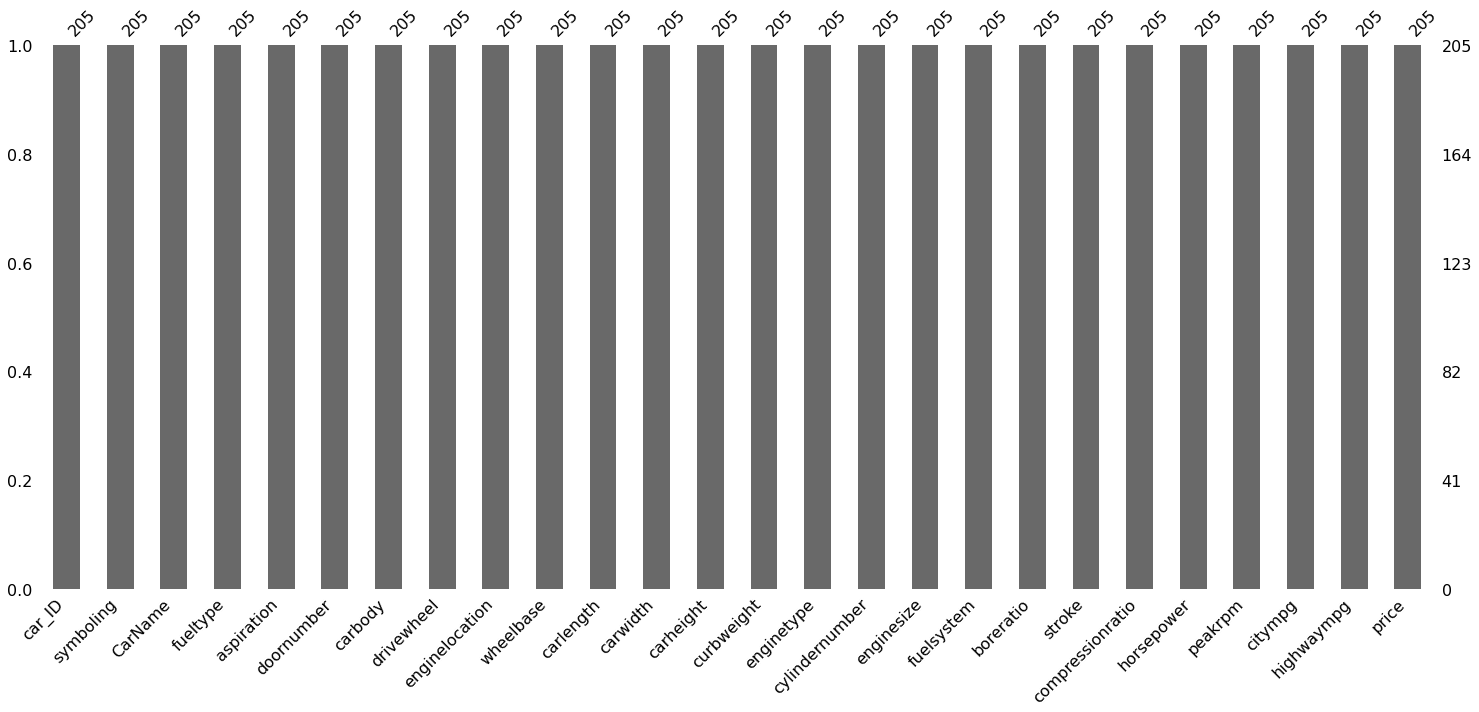

In [ ]:
# msno.bar is a simple visualization of null values by column:

import missingno as msno           # missing values and its pattern

msno.bar(cars.sample(205))

* From the above plot, we are clear that there are no missing values in our data.

#### Data type Analysis

In [ ]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

We've seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it can be used in the model as a numeric variable also.

In [ ]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# CarName: first few entries
cars['CarName'][:30]


0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.

In [ ]:
#Separating the company name from the car model 

CompanyName = cars["CarName"].apply(lambda x : x.split(' ')[0])
CompanyName[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [ ]:
#Addition of a new column 

cars.insert(3,"CompanyName",CompanyName)


In [ ]:
#Removal of the CarName column

cars.drop(["CarName"],axis=1,inplace=True)
cars.sample()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
159,160,0,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0


In [ ]:
# look at all values 
cars['CompanyName'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

Notice that some car-company names are misspelled - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

#### Formatting of dataset

In [ ]:
# Formatting the car brand name to start with a capital letter 

cars["CompanyName"] = cars["CompanyName"].str.capitalize()

In [ ]:
# Names of all car brands in the dataset

cars.CompanyName.unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Maxda', 'Mazda', 'Buick', 'Mercury',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Porsche',
       'Porcshce', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Toyouta',
       'Vokswagen', 'Volkswagen', 'Vw', 'Volvo'], dtype=object)

In [ ]:
#Formatting of wrong car brand names 

def replaceCompanyName(x,y):
    cars["CompanyName"].replace(x,y,inplace=True)

replaceCompanyName("Maxda","Mazda")
replaceCompanyName("Porcshce","Porsche")
replaceCompanyName("Toyouta","Toyota")
replaceCompanyName("Vokswagen","Volkswagen")
replaceCompanyName("Vw","Volkswagen")

Examining unique values for each column is necessary to avoid unnecessary issues.

In [ ]:
# Formatted car brand names 

cars.CompanyName.unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
# Checking the existence of duplicate cars in the dataset

sum(cars.duplicated(subset = "car_ID")) == 0

True

In [ ]:
# Checking the existence of duplicates in the entire dataset 

cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


* We have seen that there are no duplicate entries in our dataset

#### Outliers

In [ ]:
# outliers
cars.describe()


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's check the data distribution of each column so that we can spot any such errors in the data.

## 3. Visualization and grouping of data

## Numerical columns

In [ ]:
sns.set_palette('mako')

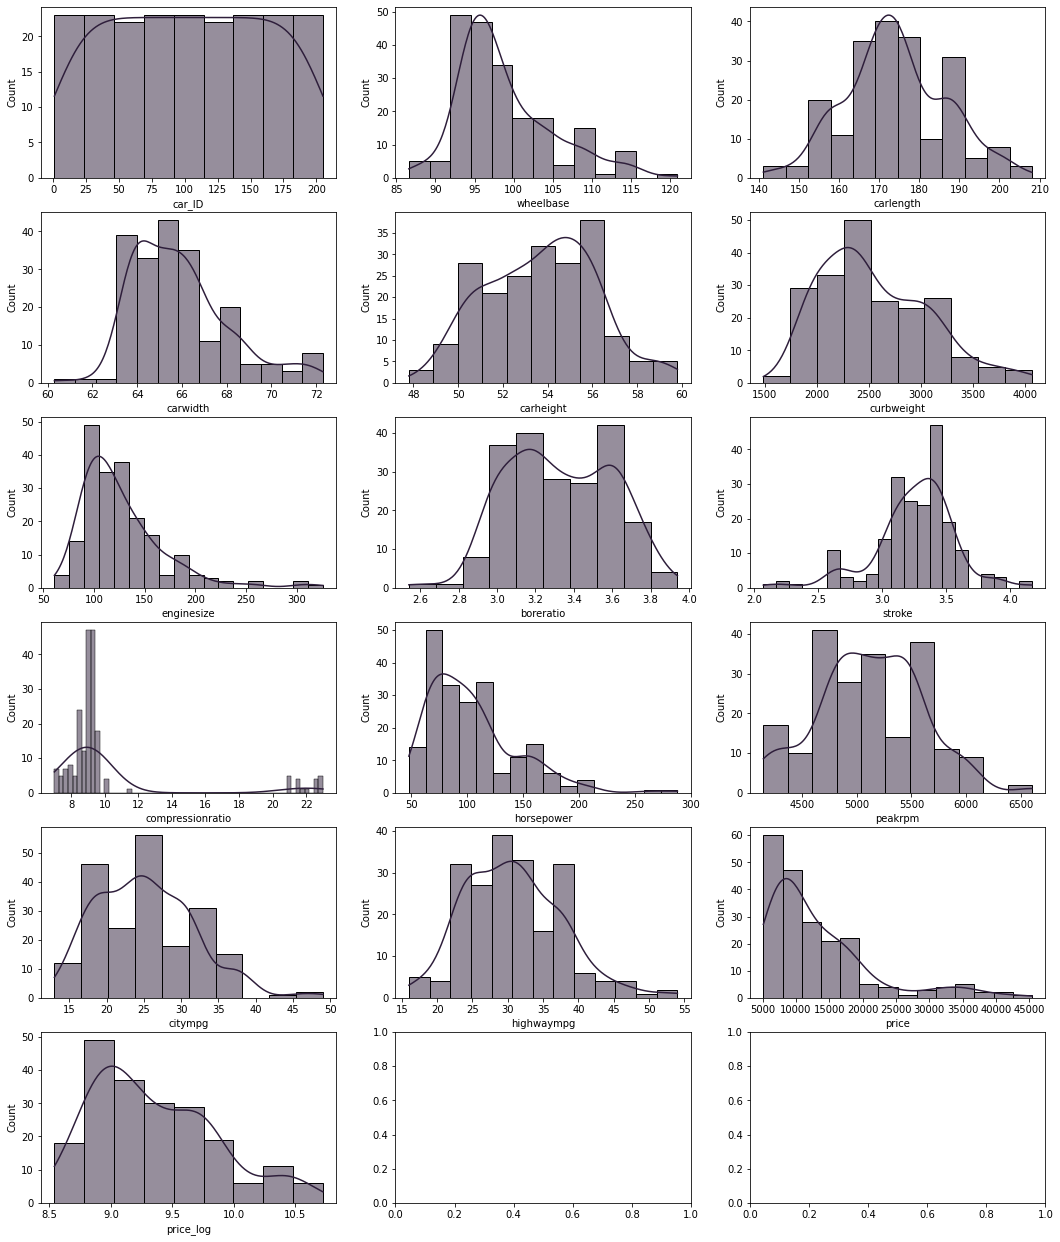

In [ ]:
_,ax= plt.subplots(6,3,figsize=(18,22))
numericals= cars.select_dtypes(include='number').columns
for i in range(len(numericals)):
    sns.histplot(data=cars[numericals[i]],ax=ax[i//3][i%3],kde=True,palette='mako')

There don't seem to be any anamolies in the numerical columns as evident from the above histograms. Almost all of them are skewed in one way or the other which we need to take care of before building models on the dataset.

* Here we can see that, the target variable is right skewed. let's do log transformation. Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

#### Log Transformation

In [ ]:
# Function for log transformation of the column
def log_transform(cars,col):
    for colname in col:
        if (cars[colname] == 1.0).all():
            cars[colname + '_log'] = np.log(cars[colname]+1)
        else:
            cars[colname + '_log'] = np.log(cars[colname])
    cars.info()

In [ ]:
log_transform(cars,['price'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


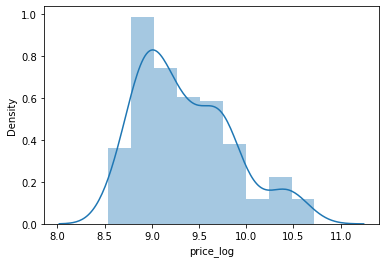

In [ ]:
#Log transformation of the feature 'price'
sns.distplot(cars["price_log"], axlabel="price_log");

Now distribution of the car prices looks much more normal.

Before we will start to analyse relationship between variables, we need to take a look at our dependent variable 'price'. We want it to be without outliers and also it's distribution being approximately normal . First, take a look if there any ouliers:

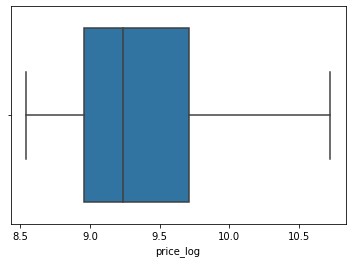

In [ ]:
# Boxplot to see outliers

sns.boxplot(x=cars['price_log'])


It looks like we have here some outliers. Let's use z-score to check which obsrvation we can call 'outlier'. The data with z-score > 3 or < -3 should be considered as outliers:

In [ ]:
z_score = stats.zscore(cars['price'])
print(z_score)

0      0.027391
1      0.404461
2      0.404461
3      0.084485
4      0.523668
         ...   
200    0.447752
201    0.723810
202    1.029983
203    1.153582
204    1.173031
Name: price, Length: 205, dtype: float64


In [ ]:
outlier = cars[np.abs(z_score) > 3]
print(outlier)


    car_ID symboling CompanyName fueltype aspiration doornumber  carbody  \
16      17         0         Bmw      gas        std        two    sedan   
73      74         0       Buick      gas        std       four    sedan   
74      75         1       Buick      gas        std        two  hardtop   

   drivewheel enginelocation  wheelbase  ...  fuelsystem  boreratio  stroke  \
16        rwd          front      103.5  ...        mpfi       3.62    3.39   
73        rwd          front      120.9  ...        mpfi       3.80    3.35   
74        rwd          front      112.0  ...        mpfi       3.80    3.35   

    compressionratio horsepower peakrpm  citympg highwaympg    price  \
16               8.0        182    5400       16         22  41315.0   
73               8.0        184    4500       14         16  40960.0   
74               8.0        184    4500       14         16  45400.0   

    price_log  
16  10.628981  
73  10.620351  
74  10.723267  

[3 rows x 27 columns]


so we have 3 observations which we can call outliers. Maybe we would need to remove it, but if we try to understand why these cars are so expensive, we would need to take a look at the rows above and see that there are two buicks and one BMX x5, they are usually quite exepensive cars, so probably it's not really a 'wrong' data, they are just small amount of really expensive cars, but they shouldn't effect on the accuracy of our model.

what if we could transform it to a much comfortable distribution like normal distribution? That would make our job a lot easier. Fortunately, we have a way to transform power-law or any non-linear distribution to normal using a Box-Cox Transformation

#### Boxcox Transformation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -5.085980358398768


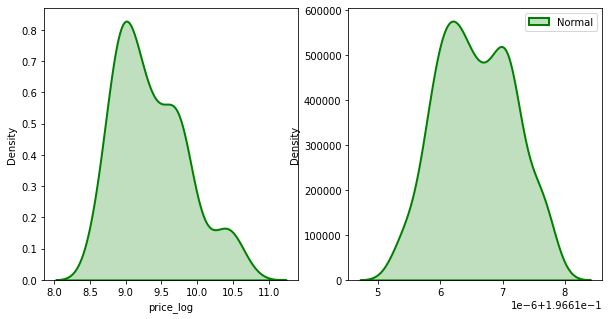

In [ ]:
# To show Box-cox Transformation of non-normal data
 
# generate non-normal data (exponential)
#original_data = np.random.exponential(size = 1000)
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(cars["price_log"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(cars["price_log"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Let's see the outliers again

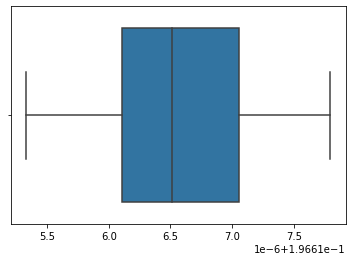

In [ ]:
sns.boxplot(x=fitted_data)

From the above plot, we can say that, data is normally distributed.

Now let's analyse prices, take a look at how it looks like. First - take a look at distribution plot:

** Note: After log transformation and Boxcox transformation, we should use the transformed data. For better analysis, I am going to use the data before transformation in the coming plots as well as original price data. You can visualize more plots using the data after transformation(For price_log and fitted_data). 
- Transformation helps us to create normal distribution. However, interpretation is tough. Hence, we have used original price data for many other pattern findings. For final model, we have to use tranformed data.

#### Analysis of target variable (price)

In [ ]:
#Percentiles in the price of cars 

cars.price.describe(percentiles = [0.10,0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

### Inference :
* There is a significant difference between the mean and the median of the price distribution.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [ ]:
#Grouping of cars by brands and calculation of average price based on features
medianPriceBasedCategory = pd.DataFrame(cars.groupby(["CompanyName",
                                                    "fueltype",
                                                    "doornumber",
                                                    "carbody",
                                                    "horsepower"])["price"].median().sort_values(ascending = False))
medianPriceBasedCategory

,,,,,price
CompanyName,fueltype,doornumber,carbody,horsepower,
Buick,gas,two,hardtop,184,45400.0
Bmw,gas,two,sedan,182,41315.0
Buick,gas,four,sedan,184,40960.0
Porsche,gas,two,convertible,207,37028.0
Jaguar,gas,two,sedan,262,36000.0
...,...,...,...,...,...
Toyota,gas,two,hatchback,62,5843.0
Plymouth,gas,two,hatchback,68,5572.0
Honda,gas,two,hatchback,60,5399.0


In [ ]:
#Grouping of cars by brands and calculation of basic parameters 
priceStatistics = cars.groupby("CompanyName")["price"].agg(['min', 'max', "median"])
priceStatistics["rank"] = priceStatistics["median"].rank(ascending=False).astype(int)
priceStatistics = priceStatistics.sort_values("median", ascending=False)
priceStatistics

,min,max,median,rank
CompanyName,,,,
Jaguar,32250.0,36000.0,35550.0,1
Buick,25552.0,45400.0,32892.0,2
Porsche,22018.0,37028.0,32528.0,3
Bmw,16430.0,41315.0,22835.0,4
Volvo,12940.0,22625.0,18420.0,5
Audi,13950.0,23875.0,17710.0,6
Peugeot,11900.0,18150.0,16630.0,7
Mercury,16503.0,16503.0,16503.0,8
Alfa-romero,13495.0,16500.0,16500.0,9


### Observations:

* The average price of a car in the data set is 13 276.71.

* The median is 10 295 and there is a notable difference between average car price and median.

* 85% of the prices of cars are below 18 500, whereas the rest 15% are between 18 500 and 45 400. 

* Taking into account the average price, the most expensive car in the database is a Buick, gas-powered with two doors, "hardtop" type of car body with 184 horsepower. The average price of such a car is 45 400.

* Taking into account the average price, the cheapest car in the dataset is a Subaru, gas-powered with two-doors, "hetchback" type of car body with 69 horsepower. The average price of such a car is 5 118. 

* Jaguar cars have the highest average price in the dataset. Then there are Buick and Porsche cars.

* The lowest average price in the dataset is for Chevrolet cars.

### 4.2 Visualization of categorical data

In [ ]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_log
0,1,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,9.510075
1,2,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,9.711116
2,3,1,Alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,9.711116
3,4,2,Audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.543235
4,5,2,Audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,9.767095


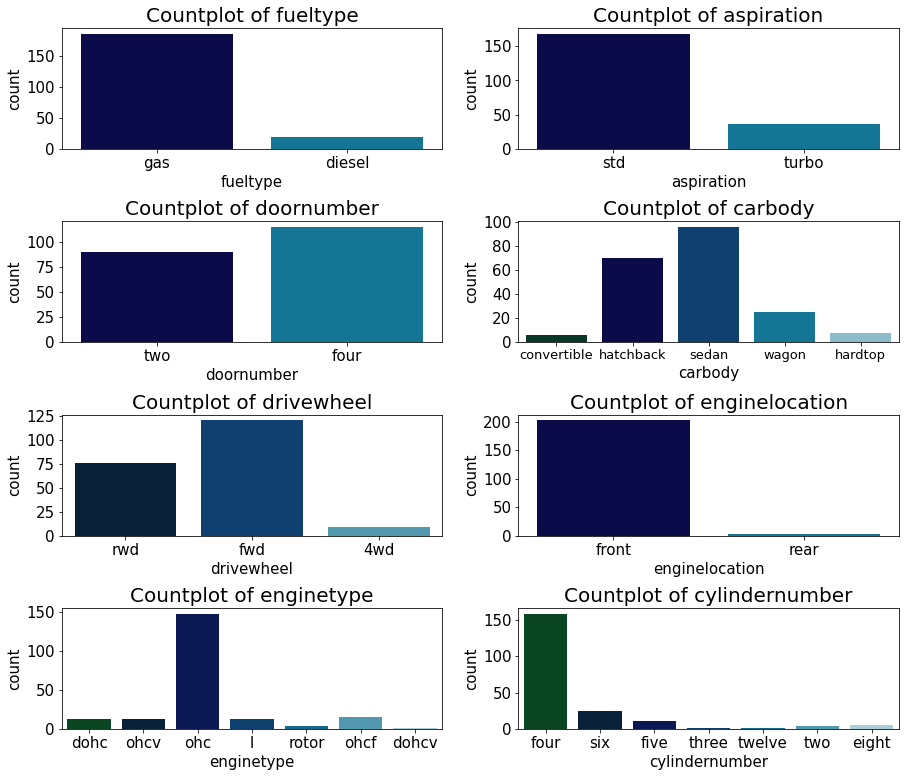

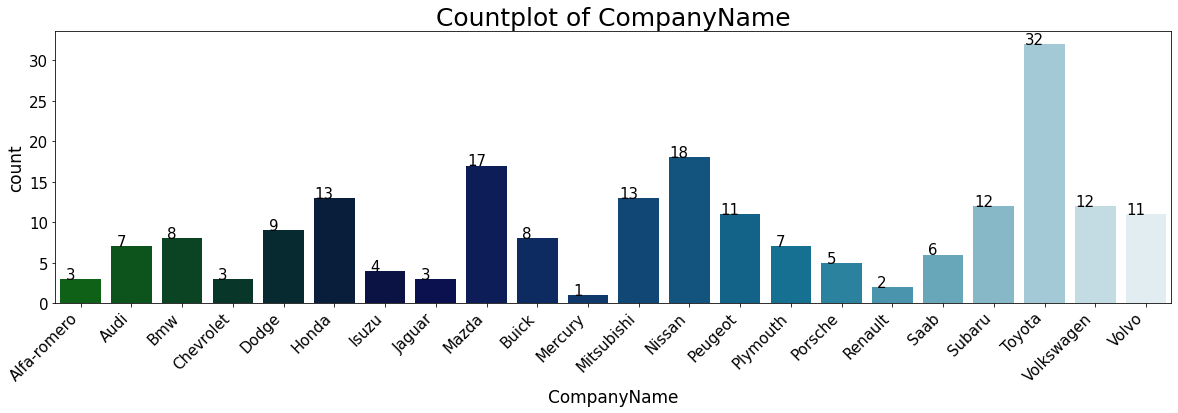

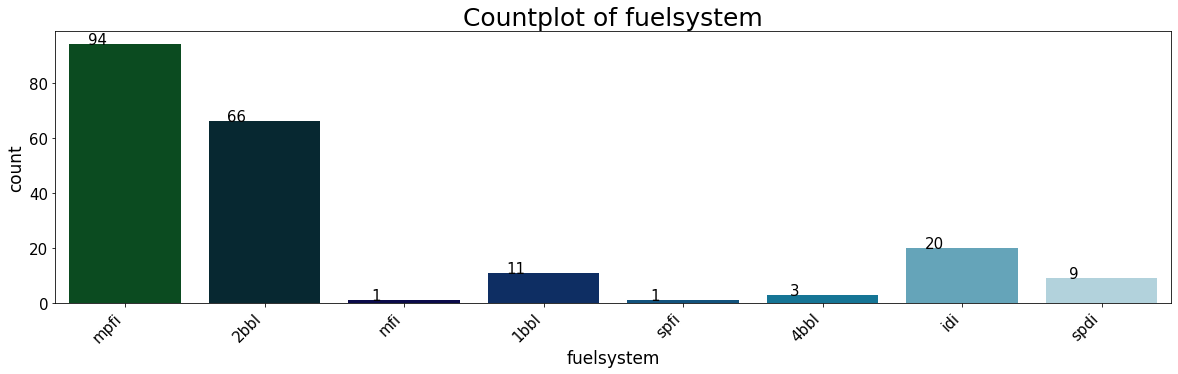

In [ ]:
#Countplots of categorical data

#Size of plots

plt.figure(figsize = (15,20))

#Vertical distance configuration between plots 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)

#fueltype

plt.subplot(6,2,1)
ax=sns.countplot(x = "fueltype", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of fueltype", fontsize = 20)
plt.xlabel("fueltype",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#aspiration

plt.subplot(6,2,2)
ax=sns.countplot(x = "aspiration", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of aspiration", fontsize = 20)
plt.xlabel("aspiration",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#doornumber

plt.subplot(6,2,3)
ax=sns.countplot(x = "doornumber", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of doornumber", fontsize = 20)
plt.xlabel("doornumber",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#carbody

plt.subplot(6,2,4)    
ax=sns.countplot(x = "carbody", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of carbody", fontsize = 20)
plt.xlabel("carbody",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

#drivewheel

plt.subplot(6,2,5)
ax=sns.countplot(x = "drivewheel", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of drivewheel", fontsize = 20)
plt.xlabel("drivewheel",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#enginelocation

plt.subplot(6,2,6)
ax=sns.countplot(x = "enginelocation", data = cars, palette="ocean").set_title("Countplot of enginelocation", fontsize = 20)
plt.xlabel("enginelocation",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#enginetype

plt.subplot(6,2,7)
ax=sns.countplot(x = "enginetype", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of enginetype", fontsize = 20)
plt.xlabel("enginetype",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#cylindernumber

plt.subplot(6,2,8)
ax=sns.countplot(x = "cylindernumber", 
                 data = cars, 
                 palette="ocean").set_title("Countplot of cylindernumber", fontsize = 20)
plt.xlabel("cylindernumber",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#CompanyName

plt.figure(figsize = (20,5))
ax=sns.countplot(x = "CompanyName", 
                 data = cars, 
                 palette="ocean")
ax.set_title("Countplot of CompanyName", fontsize = 25)
plt.xlabel("CompanyName",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
plt.yticks(fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

#fuelsystem

plt.figure(figsize = (20,5))
ax=sns.countplot(x = "fuelsystem", 
                 data = cars, 
                 palette="ocean")
ax.set_title("Countplot of fuelsystem", fontsize = 25)
plt.xlabel("fuelsystem",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
plt.yticks(fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")
    
plt.show()

### Observations:

* Toyota is the most frequently purchased car brand in the database.

* Four-cylinder cars are by far the most frequently bought.

* Customers prefer the sedan type the most, however, not much less popular is the hatchback.

* The data set shows great interest in gas-powered cars as opposed to oil-powered ones.

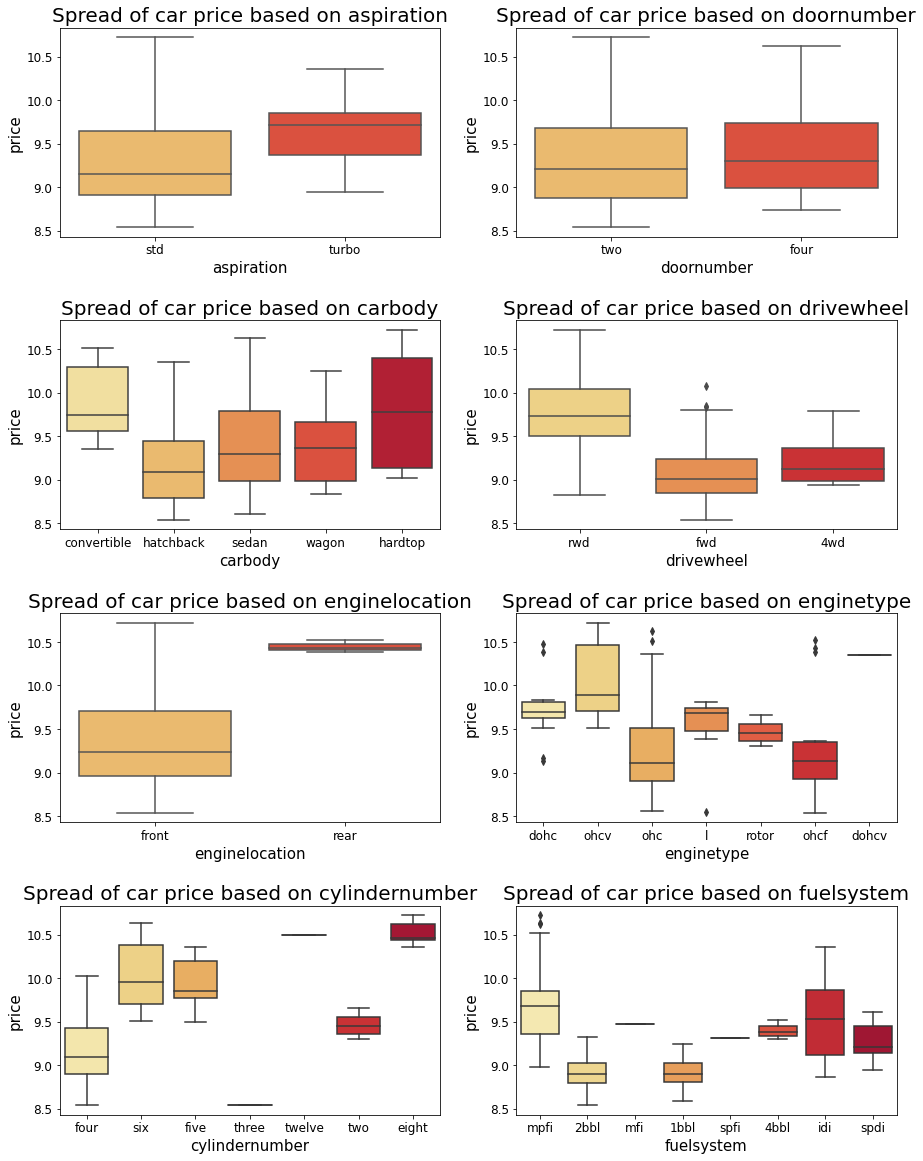

In [ ]:
#Boxplots of car price spread based on features 
#Size of plots
plt.figure(figsize = (15,20))

#Vertical and horizontal distance configuration between plots 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

#aspiration
plt.subplot(4,2,1)
sns.boxplot(x="aspiration",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on aspiration", fontsize=20)
plt.xlabel("aspiration",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#doornumber
plt.subplot(4,2,2)
sns.boxplot(x="doornumber",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on doornumber", fontsize=20)
plt.xlabel("doornumber",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#carbody
plt.subplot(4,2,3)
sns.boxplot(x="carbody",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on carbody", fontsize=20)
plt.xlabel("carbody",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#drivewheel
plt.subplot(4,2,4)
sns.boxplot(x="drivewheel",
            y="price_log",
            data=cars,
            palette='YlOrRd').set_title("Spread of car price based on drivewheel", fontsize=20)
plt.xlabel("drivewheel",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#enginelocation
plt.subplot(4,2,5)
sns.boxplot(x="enginelocation",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on enginelocation", fontsize=20)
plt.xlabel("enginelocation",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#enginetype
plt.subplot(4,2,6)
sns.boxplot(x="enginetype",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on enginetype", fontsize=20)
plt.xlabel("enginetype",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#cylindernumber
plt.subplot(4,2,7)
sns.boxplot(x="cylindernumber",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on cylindernumber", fontsize=20)
plt.xlabel("cylindernumber",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#fuelsystem
plt.subplot(4,2,8)
sns.boxplot(x="fuelsystem",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on fuelsystem", fontsize=20)
plt.xlabel("fuelsystem",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

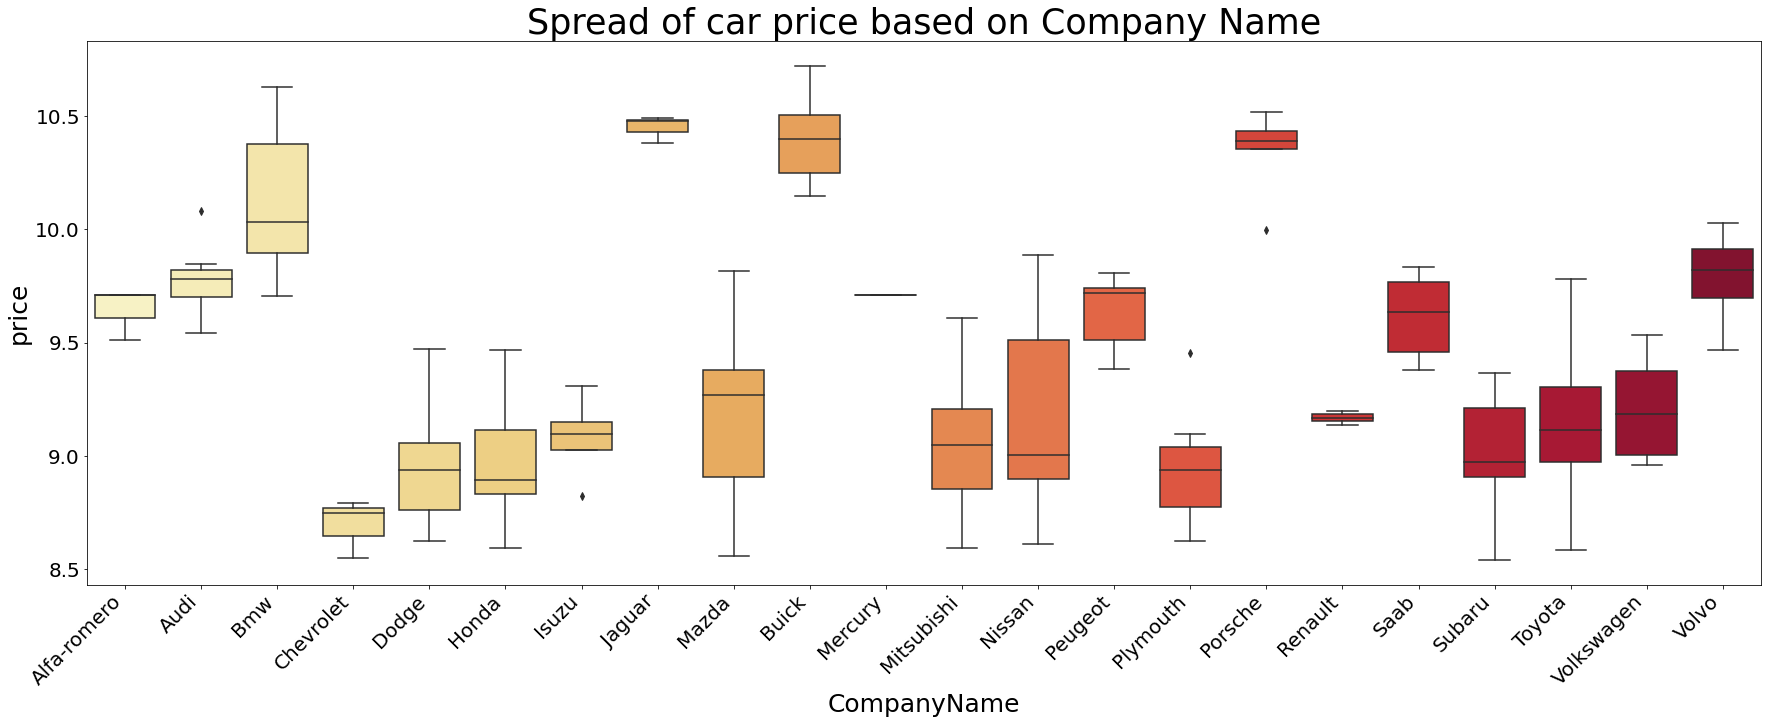

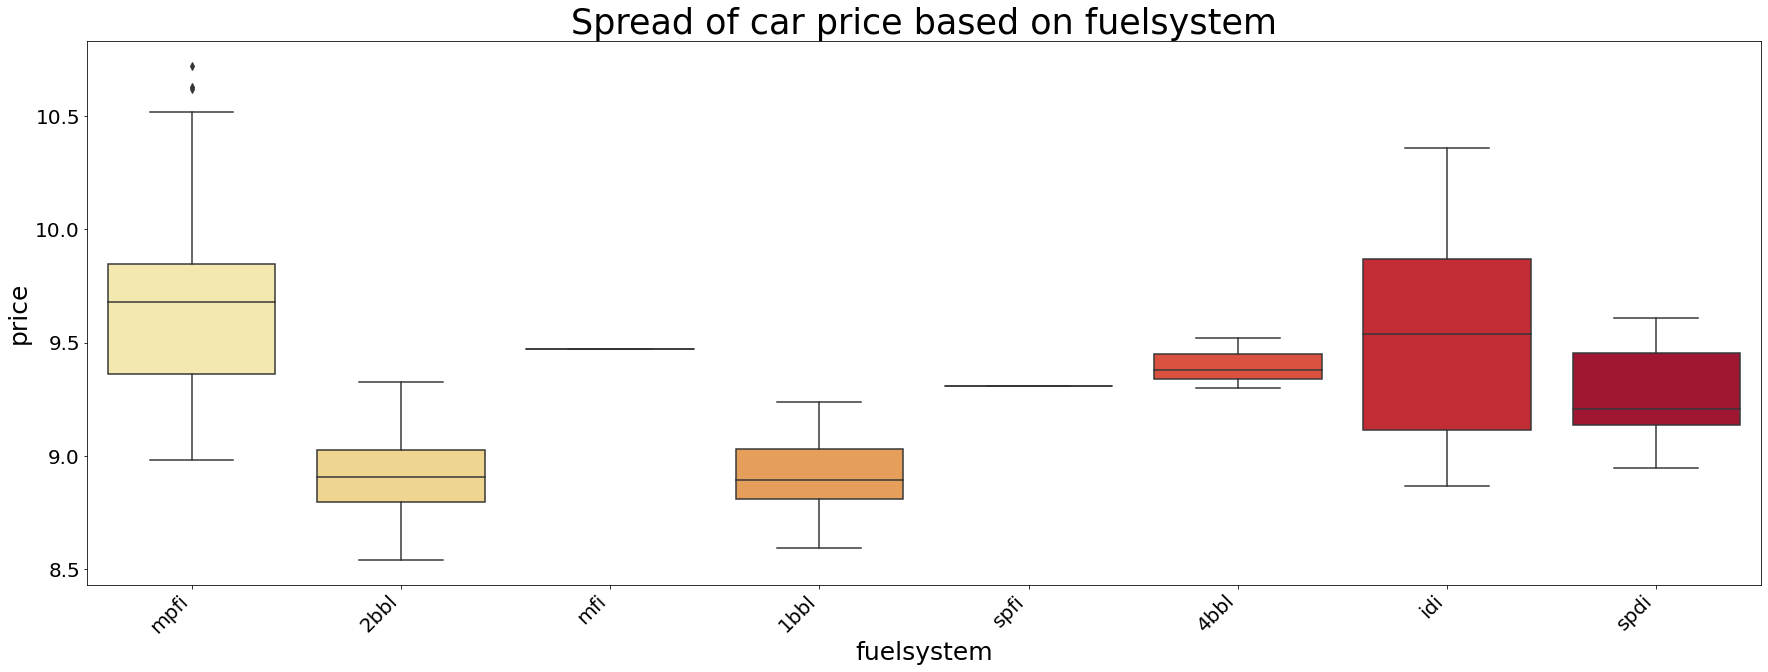

In [ ]:
#Boxplots of car price spread based on features 

#Size of plot 

plt.figure(figsize = (30,10))

#CompanyName

sns.boxplot(x="CompanyName",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on Company Name", fontsize=35)
plt.xlabel("CompanyName",fontsize=25)
plt.ylabel("price", fontsize=25)
plt.xticks(rotation=45, fontsize=20, horizontalalignment="right")
plt.yticks(fontsize=20)


#Boxplots of plot 

plt.figure(figsize = (30,10))

#fuelsystem

sns.boxplot(x="fuelsystem",
            y="price_log",
            data=cars,
            palette="YlOrRd").set_title("Spread of car price based on fuelsystem", fontsize=35)
plt.xlabel("fuelsystem",fontsize=25)
plt.ylabel("price", fontsize=25)
plt.xticks(rotation=45, fontsize=20, horizontalalignment="right")
plt.yticks(fontsize=20)

plt.show()

List of significant variables after Visual analysis :
- City mpg 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- High way mpg 

## 4. Data Preparation

Let's prepare the data for model building

Now split the data into X and y

In [ ]:
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'CompanyName']]
y = cars['price']

### Dummy variables and binary coding

In [ ]:
#Binary coding of values with 2 levels

cars["fueltype"]= cars["fueltype"].map({"gas":0, "diesel":1})
cars["enginelocation"]= cars["enginelocation"].map({"front":0, "rear":1})
cars["doornumber"]= cars["doornumber"].map({"four":4, "two":2})
cars["aspiration"]= cars["aspiration"].map({"std":0, "turbo":1})

In [ ]:
#Conversion of categorical variables with more than 2 levels to dummy variables 

def dummies(x,df):
    temp = pd.get_dummies(cars[x], drop_first = True)
    df = pd.concat([cars, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

#Activation dummies function 

cars = dummies("CompanyName",cars)
cars = dummies("carbody",cars)
cars = dummies("drivewheel",cars)
cars = dummies("enginetype",cars)
cars = dummies("cylindernumber",cars)
cars = dummies("fuelsystem",cars)

In [ ]:
#Dataset with dummy variables

cars.head(10)

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,0,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
5,6,2,0,0,2,0,99.8,177.3,66.3,53.1,...,0,0,0,0,0,0,0,1,0,0
6,7,1,0,0,4,0,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
7,8,1,0,0,4,0,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
8,9,1,0,1,4,0,105.8,192.7,71.4,55.9,...,0,0,0,0,0,0,0,1,0,0
9,10,0,0,1,2,0,99.5,178.2,67.9,52.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Shape of dataset after dummying 

print("Dataset contains {} observations as well as {} variables.".format(cars.shape[0], cars.shape[1]))

Dataset contains 205 observations as well as 67 variables.


Creating dummy variables for categorical variables

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Audi


In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CompanyName_Nissan,CompanyName_Peugeot,CompanyName_Plymouth,CompanyName_Porsche,CompanyName_Renault,CompanyName_Saab,CompanyName_Subaru,CompanyName_Toyota,CompanyName_Volkswagen,CompanyName_Volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)


In [ ]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)


In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_Audi',
       'CompanyName_Bmw', 'CompanyName_Buick', 'CompanyName_Chevrolet',


** Note: To understand the concept of how to use feature selection methods, I am opting linear regression (Supervised ML Algorithm). You will come to know about ML algorithms in the coming sessions.

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


## 4. Model Building and Evaluation

In [ ]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.15665864e+03
  5.50557360e+02  6.45972107e+01  1.55937229e+02  9.01690070e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.78808440e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03 -4.55717529e-27
 -2.08926886e+02 -5.83874480e+01  6.82121026e-13  5.21573928e+02
  2.39504091e+03  3.76793525e+02 -1.83326364e+02 -6.98406228e+02
 -5.19749514e+02  6.03320099e+01 -4.92211850e+02  3.10813552e+02
 -6.82121026e-13 -1.05964701e+03  3.61145168e+02 -4.85552717e+02
 -6.84202629e+02  1.44392

In [ ]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))


0.8382621393399071


Not bad, we are getting approx. 83% r-squared with all the variables. Let's see how much we can get with lesser features.

### Model Building Using RFE

Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the statsmodels library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

* The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

* It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  


[ True  True  True  True  True  True  True  True  True False  True False
 False False False False False False  True  True False  True  True  True
  True False False  True False False False  True False  True  True  True
 False  True  True  True  True False  True False False False False False
  True False False  True False False False False False  True False  True
  True  True False  True False False False  True]
[ 1  1  1  1  1  1  1  1  1 16  1 26  3  6  8  9  7 10  1  1 18  1  1  1
  1 28  4  1 14 27  5  1 19  1  1  1 13  1  1  1  1 25  1 35 29 31 33 17
  1 20 11  1  2 30 15 23 34  1 21  1  1  1 32  1 12 24 22  1]


In [ ]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))


0.8940080120020504


Next we can go with 6 features. This process is repeated until a specified number of features remains. When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.

** Note: Choosing RFE for feature selection is one way, You can use other methods also for best model building.

## 6. Conclusion:

General summary

* The aim of this project is to predict car price based on its attributes.
* To predict car price, we need to build models using machine learning techniques.

EDA (Exploratory Data Analysis) summary

* Base dataset contained 25 features and 1 target variable (price). Furthermore the dataset had only 205 observations.
* The dataset did not contain missing values.
* Data was cleaned, formatted, then grouped and visualised using countplot, boxplot or histogram.

Feature Engineering summary

* In order to build the best models and avoid overfitting, we can use three different data selection methods to build the models: Pearson correlation, RFE (Recursive Feature Elimination) as well as Lasso regularizaion.

* Features: car brand (Buick), boreratio, drivewheel (rwd), fuelsystem (mpfi) have the most significant impact on price Increase and drivewheel (fwd), fuelsystem (2bbl), doorsnumber (4) have the most significant impact on price decrease.

### * Note:

It's always the best practise to include

1. A Suitable title

2. A proper Introduction with all the Information you have

3. Comments to understand each block of code

4. Perfect as well as suitable visualisation methods

5. Detail explanation of the observations and Insights that are helpful for Business development

This EDA is one perspective of data exploration to get Insights out of it for business development. You can explore in different ways for more Insights to dive the ocean of DataScience. 

All the best. 


##### Thank you ##############